In [1]:
#@title Apache 2.0 License
# Copyright 2022 Datablooz, Luka Anicin
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Regression with TensorFlow 2 (Keras)
**🥳 The lesson goal**  
This lesson will first introduce a real dataset for salary predictions. To solve that problem, we will build a Fully Connected Network using TensorFlow 2.x and use it to make predictions for new employees! 

**What is the outcome?**
- Working with a simple external dataset
- Creating and training a deep learning model for regression task

**📝 Lesson Structure**  
- Dataset
    - Loading a dataset
    - Preprocessing
- Modeling
    - Defining
    - Compiling
    - Training
    - Predicting with the trained model

**📊 Dataset source:**

The dataset that we are using in this lesson originated from [kaggle](https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset)

# Dataset

The dataset consists of two columns - `years_of_experience` and `salary` (in thousands of $). Our goal is to predict a salary based on the input variable (years of experience). This is a common problem to see in the wild, but the datasets will generally be more complex and dirty.

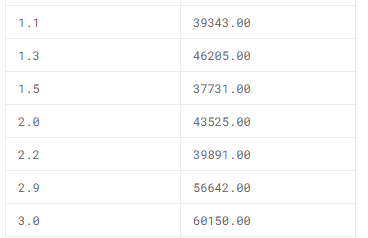

**💻 Industry Perspective**  
This dataset is very small and clean, rarely a case in the industry. When you start working, you'll generally find either a tiny dataset that you need to find a way to make useful or the dataset will be huge but very dirty as well! 

This example is a good introduction for you to experiment with the modeling phase of the project. Still, the dataset side is not a great representation of industry data you'll encounter in your career.

### Import Packages

For today's lesson we need `pandas` and `sklearn` libraries to support the data loading-preprocessing stage.

In [2]:
import numpy as np
import pandas as pd

# Used to normalize dataset 
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### **Dataset import**

**💯 Exam pointers**

You'll work with external libraries such as `tensorflow_datasets (tfds)` at the exam, but you won't be using Pandas. However, my recommendation is to learn to use Pandas because it will come to unlock some job perspectives in the future. I will link free Pandas resources at the bottom of this notebook. 

**NOTE:** Please follow [this YouTube tutorial](https://www.youtube.com/watch?v=6HFlwqK3oeo) on how to import CSV files into Google Colab if you don't have experience with this

In [3]:
!wget -O salary_dataset.zip https://github.com/AlexanderLavelle/ALWorks/blob/main/TensorFlow%20Dev%20Cert/Luka/2%20-%20Regression/Years%20of%20experience%20and%20Salary%20dataset.zip?raw=true  
import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile('salary_dataset.zip', "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-06 20:39:42--  https://github.com/AlexanderLavelle/ALWorks/blob/main/TensorFlow%20Dev%20Cert/Luka/2%20-%20Regression/Years%20of%20experience%20and%20Salary%20dataset.zip?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AlexanderLavelle/ALWorks/raw/main/TensorFlow%20Dev%20Cert/Luka/2%20-%20Regression/Years%20of%20experience%20and%20Salary%20dataset.zip [following]
--2022-01-06 20:39:42--  https://github.com/AlexanderLavelle/ALWorks/raw/main/TensorFlow%20Dev%20Cert/Luka/2%20-%20Regression/Years%20of%20experience%20and%20Salary%20dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlexanderLavelle/ALWorks/main/TensorFlow%20Dev%20Cert/Luka/2%20-%20Regression/Years%20of%20experience%20and%20Salary%20dataset.zip [following

In [7]:
data = pd.read_csv("Salary_Data.csv")

In [9]:
data.shape

(30, 2)

In [12]:
data = data.values

### Data preprocessing

The only preprocessing step needed is scaling salaries in the dataset.

Wait, but why are we scaling this column?
Our years' column is on a scale from 1-10 while salaries could go pretty much to millions (if we get info from some IT company khm). To make the job easier for our algorithm, we will scale salaries to scale from 0 to 1 (You could do from 0 to 10 to be on the same scale as our years of experience - try both and see what works better :) ).

If you haven't worked with MinMaxScaler before, [here](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Use%20MinMaxScaler%20if%20you%20want,sample%20rows%2C%20not%20feature%20columns.) is a fantastic blog where you can learn more about it and when/why to apply it.

In [13]:
scaler = MinMaxScaler()
features = data[:, 0]
targets  = scaler.fit_transform(data[:, 1].reshape(-1, 1))

# Modeling



### Defining a model

The network I've used for this task is similar to the one we defined in the first lesson. I encourage you to experiment here, add more Dense layers, change activation function, add/decrease units per layer, etc. 


My experiment here has two Dense layers (input(100) + output_layer(1))

In [14]:
model = Sequential([Dense(units=100, activation='relu', input_shape=[1]),
                    Dense(units=1)])

### Compiling the model

For this experiment we will use a classical optimizer function - `stocastic_gradient_descent` and loss function - `mean_squared_error` (you could try `mean_absolute_error` and check what performs better.

In [15]:
model.compile(optimizer='sgd', loss='mean_squared_error')

### Training

Sweet spot that I found for this task was 50 epochs, but you can try to play with this number

In [16]:
model.fit(features, targets, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 574ms/step - loss: 0.6007
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0203
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0097
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0093
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - lo

### Predicting

Let's predict the new employee with `5.4` years of experience.

NOTE: Since we trained the network on scaled targets, we need to use that scaler object to run `inverse_transform` and get a prediction with the scale found in the dataset once we perform the prediction.

In [17]:
print("New employee gets salary of:", scaler.inverse_transform(model.predict([5.4])[0].reshape(-1, 1))[0][0], "$")

New employee gets salary of: 78701.695 $


In [44]:
tf.keras.backend.clear_session()

In [45]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(64, activation='linear', input_shape=[1,]))
model2.add(tf.keras.layers.Dense(64, activation='linear'))
model2.add(tf.keras.layers.Dense(1))

model2.compile(optimizer='Adam', loss='mse')
model2.fit(features, targets, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 388ms/step - loss: 7.6865
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 4.3357
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 1.9812
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 0.5823
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 0.0320


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

In [26]:
reg = LinearRegression(n_jobs=-1)
reg.fit(features.reshape(-1,1), targets.reshape(-1,1))
preds = reg.predict(features.reshape(-1,1))
MSE(targets, preds)

0.004362993548418736

In [39]:
print(f"New employee gets salary of: ${scaler.inverse_transform(reg.predict(np.array(5.4).reshape(-1,1)))[0][0]:,.2f}")


New employee gets salary of: $76,822.00


**💯 Exam pointers**

At the exam, you'll save your models and send that saved model to google servers, where they will run the prediction step with it and get the final score for that task. That being said, at the exam, you don't have to run these prediction steps themselves! You can send your model to Google multiple times, so don't hesitate to use that!

**📚 Learning resources:**


1. Pandas
    - https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS

2. Some approaches to Hyperparam tunning in practice (Andrew Ng)
    - https://www.youtube.com/watch?v=wKkcBPp3F1Y

# Lesson check: Where do we stand for the certificate exam?

[Full checklist](https://www.tensorflow.org/extras/cert/TF_Certificate_Candidate_Handbook.pdf)

✔️ Know how to program in Python, resolve Python issues, and compile and run Python programs in PyCharm.
    
- https://www.tensorflow.org/extras/cert/Setting_Up_TF_Developer_Certificate_Exam.pdf 

✔️ Know how to find information about TensorFlow APIs, including how to find 
guides and API references on tensorflow.org.

- https://www.tensorflow.org/api_docs/python/tf/keras/Model

✔️ Know how to debug, investigate, and solve error messages from the TensorFlow API.

- Follow the trace and messages provided in an error
- StackOverFlow

✔️ Know how to search beyond tensorflow.org, as and when necessary, to solve your TensorFlow questions.

- StackOverFlow

✔️ Know how to create ML models using TensorFlow where the model size is reasonable for the
problem being solved.

❏ Know how to save ML models and check the model file size.

- Covered later in the course

✔️ Understand the compatibility discrepancies between different versions of TensorFlow.

✔️ Use TensorFlow 2.x.

✔️ Build, compile and train machine learning (ML) models using TensorFlow.

❏ Preprocess data to get it ready for use in a model.

- We can select this, howerver there are many ways of doing this, so we will mark this point later in the course

✔️ Use models to predict results.

✔️ Build sequential models with multiple layers.

